In [1]:
import networkx as nx
import numpy as np; np.set_printoptions(suppress=True)
import pandas as pd
import matplotlib.pyplot as plt
import scipy.integrate as integrate

from simulate import ODE_simulate, GILL_simulate
from plot_module import plot_ODE, plot_gillespie, plot_network
from sim_param_from_network import names_from_network, gillespie_param_from_network, dataframes_from_network, ODE_from_network
from network_generate import network_gen_chain, network_gen_ring, network_gen_powlaw_tree

import libgillespie

# Demonstration of base network topologies

In [2]:
TIME_POINTS = np.linspace(0, 1000, 1001)

repl = 100
n_nodes = 7
start_pop = [100, 10]

SOMA_CB = 0.1
SOMA_BR = 0.1
SOMA_NSS = 250
DELTA = 0.5
TURNOVER = 2.0
GAMMA_ANT = 1.5
GAMMA_RET = 1.1

bio_param = {'soma_cb':SOMA_CB, 'soma_br':SOMA_BR, 'soma_nss':SOMA_NSS, 'delta':DELTA, 'turnover':TURNOVER, 'gamma_ant':GAMMA_ANT, 'gamma_ret':GAMMA_RET}

## Chain system

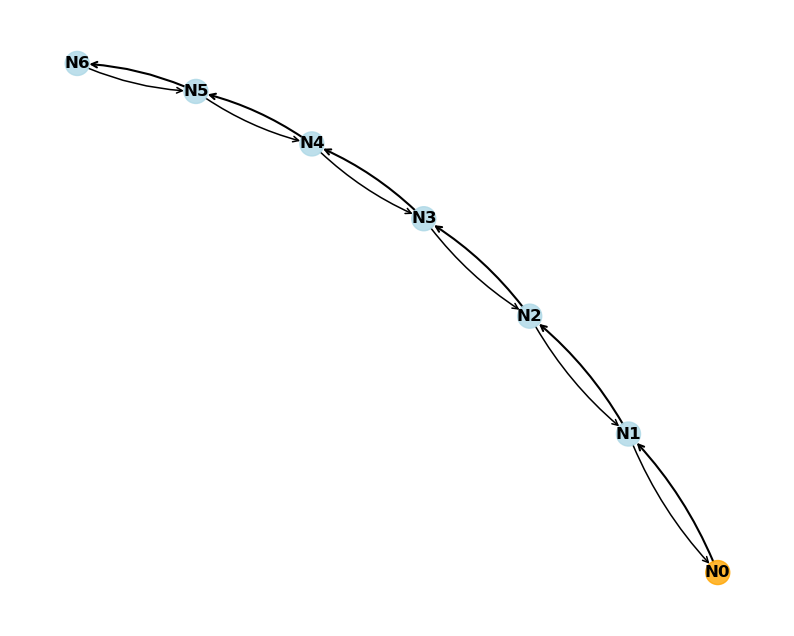

>> Code for ODE model:

global ODE_model
def ODE_model(t, z):
	# variables (node name + wt/mt)
	N0_wt, N0_mt, N1_wt, N1_mt, N2_wt, N2_mt, N3_wt, N3_mt, N4_wt, N4_mt, N5_wt, N5_mt, N6_wt, N6_mt = z
	return [
		# ΔN0_wt/Δt
		(N0_wt*((0.1 + 0.1*(250-N0_wt-(0.5*N0_mt)))-(2.0)-(1.5)))+(N1_wt*1.1),
		# ΔN0_mt/Δt
		(N0_mt*((0.1 + 0.1*(250-N0_wt-(0.5*N0_mt)))-(2.0)-(1.5)))+(N1_mt*1.1),
		# ΔN1_wt/Δt
		(N1_wt*(0-(2.0)-(2.6)))+(N0_wt*1.5)+(N2_wt*1.1),
		# ΔN1_mt/Δt
		(N1_mt*(0-(2.0)-(2.6)))+(N0_mt*1.5)+(N2_mt*1.1),
		# ΔN2_wt/Δt
		(N2_wt*(0-(2.0)-(2.6)))+(N1_wt*1.5)+(N3_wt*1.1),
		# ΔN2_mt/Δt
		(N2_mt*(0-(2.0)-(2.6)))+(N1_mt*1.5)+(N3_mt*1.1),
		# ΔN3_wt/Δt
		(N3_wt*(0-(2.0)-(2.6)))+(N2_wt*1.5)+(N4_wt*1.1),
		# ΔN3_mt/Δt
		(N3_mt*(0-(2.0)-(2.6)))+(N2_mt*1.5)+(N4_mt*1.1),
		# ΔN4_wt/Δt
		(N4_wt*(0-(2.0)-(2.6)))+(N3_wt*1.5)+(N5_wt*1.1),
		# ΔN4_mt/Δt
		(N4_mt*(0-(2.0)-(2.6)))+(N3_mt*1.5)+(N5_mt*1.1),
		# ΔN5_wt/Δt
		(N5_wt*(0-(2.0)-(2.6)))+(N4_wt*1.5)+(N6_wt*1.1),
		# ΔN5_mt/Δt
		(N5_mt*(0-(2.0)-(2

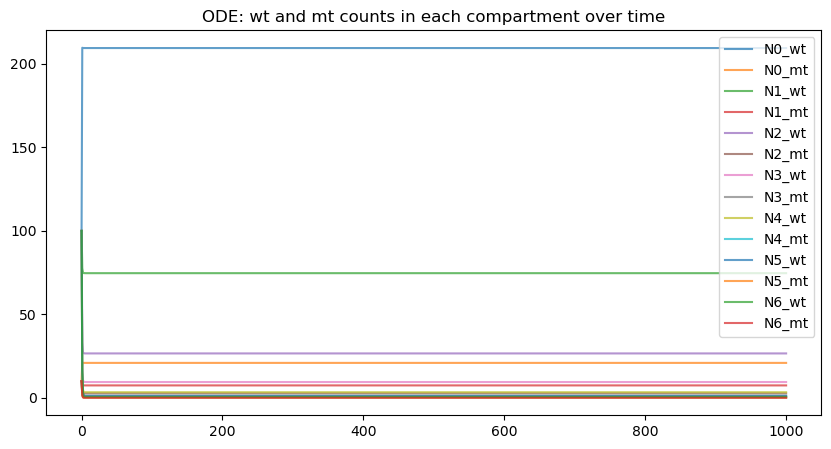

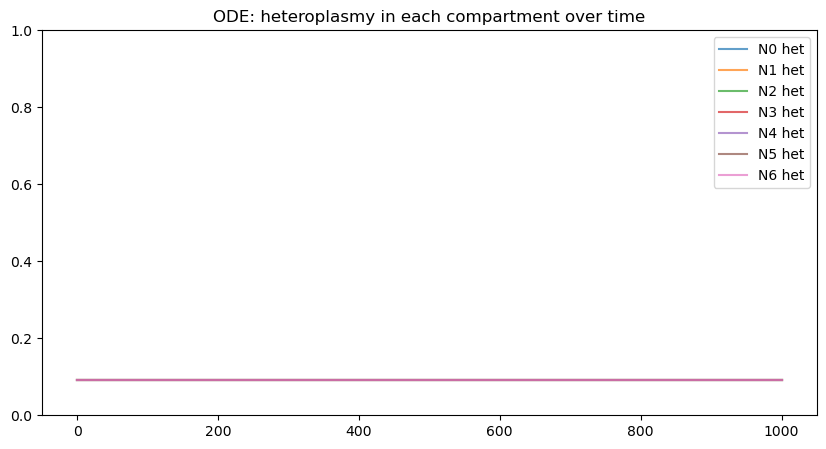

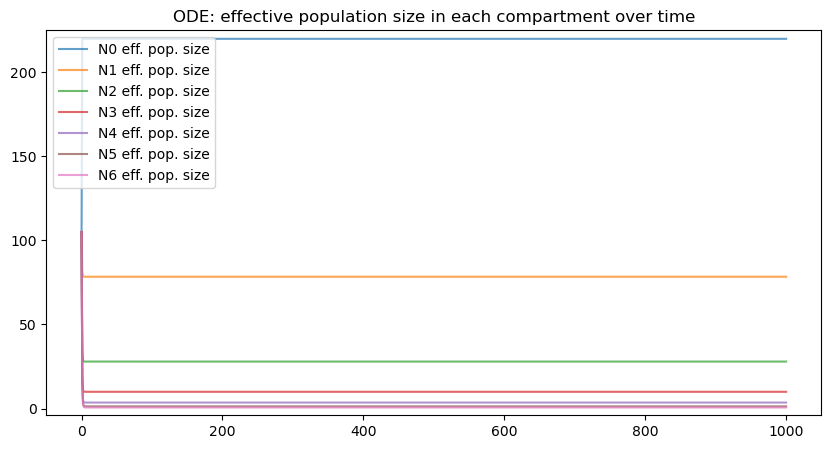

> Final counts of mt and wt in each compartment:
N0_wt	209.4488	
N0_mt	20.9449	
N1_wt	74.6633	
N1_mt	7.4663	
N2_wt	26.6163	
N2_mt	2.6616	
N3_wt	9.4909	
N3_mt	0.9491	
N4_wt	3.3941	
N4_mt	0.3394	
N5_wt	1.2516	
N5_mt	0.1252	
N6_wt	0.6056	
N6_mt	0.0606	

> Final effective population sizes in each compartment:
N0	219.9212	
N1	78.3964	
N2	27.9471	
N3	9.9654	
N4	3.5639	
N5	1.3142	
N6	0.6359	

>> Gillespie simulation parameters:

> Reactions:
react.#	state i	type	rate	update to system
0	0	birth	-1	[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1	1	birth	-1	[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2	0	death	2.0	[-1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
3	1	death	2.0	[0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
4	2	death	2.0	[0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
5	3	death	2.0	[0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
6	4	death	2.0	[0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
7	5	death	2.0	[0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
8	6	death	2.0	[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]


/home/daniel/Projects/2023_Jones_Lab_mtDNA/SSD/SSD_Neuron/plot_module.py:96: RuntimeWarning: invalid value encountered in true_divide
  het = np.nanmean(mt_counts[:,i,:]/(mt_counts[:,i,:]+wt_counts[:,i,:]), axis = 0)


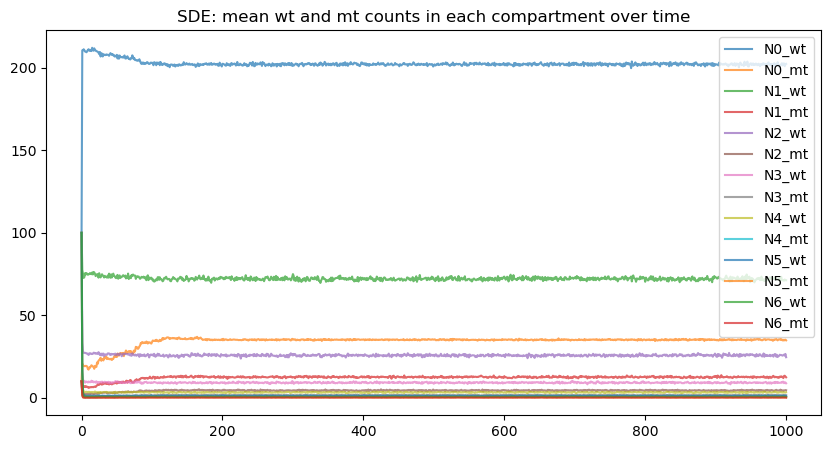

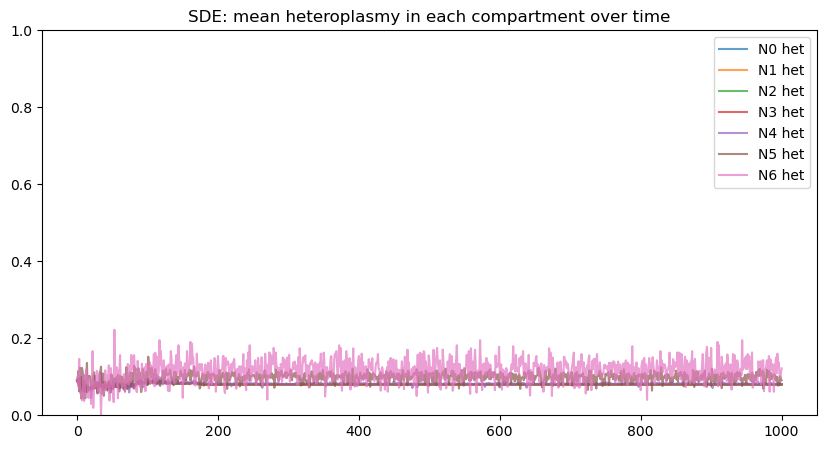

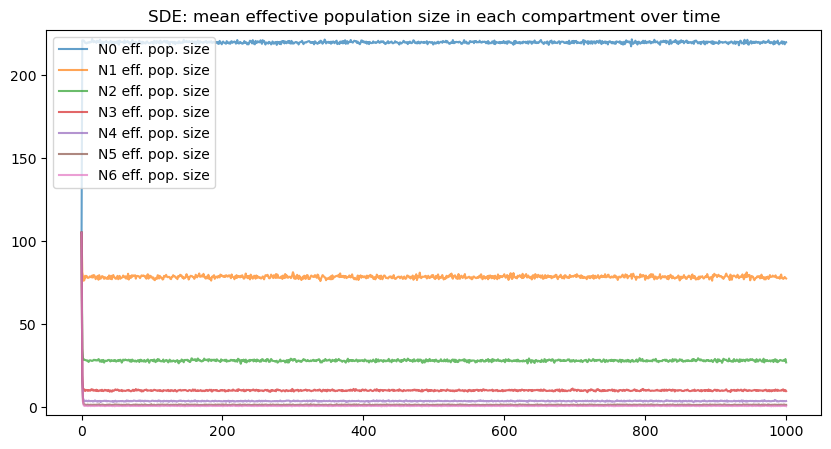

> Final mean counts of mt and wt in each compartment:
N0_wt	202.37	
N0_mt	34.81	
N1_wt	71.23	
N1_mt	12.42	
N2_wt	24.6	
N2_mt	4.55	
N3_wt	8.78	
N3_mt	1.57	
N4_wt	3.33	
N4_mt	0.52	
N5_wt	1.19	
N5_mt	0.16	
N6_wt	0.46	
N6_mt	0.09	

> Final mean heteroplasmy in each compartment:
N0	0.08	
N1	0.08	
N2	0.08	
N3	0.08	
N4	0.0808	
N5	0.0909	
N6	0.122	

> Final mean effective population sizes in each compartment:
N0	219.775	
N1	77.44	
N2	26.875	
N3	9.565	
N4	3.59	
N5	1.27	
N6	0.505	

> Change in mean heteroplasmy: 
start: 0.0909
final: 0.0798
delta: -0.0111


In [3]:
C_G, C_VARS, C_COMP, C_START_STATE = network_gen_chain(n_nodes, start_pop ,bio_param)
plot_network(C_G)

C_ODE_model = ODE_from_network(C_G)
plot_ODE(ODE_simulate(C_ODE_model, TIME_POINTS, C_START_STATE), TIME_POINTS, DELTA, C_VARS, C_COMP)

C_GILL_PARAM = gillespie_param_from_network(C_G)
plot_gillespie(GILL_simulate(C_GILL_PARAM, TIME_POINTS, C_START_STATE, repl), TIME_POINTS, DELTA, C_VARS, C_COMP)

## Ring system

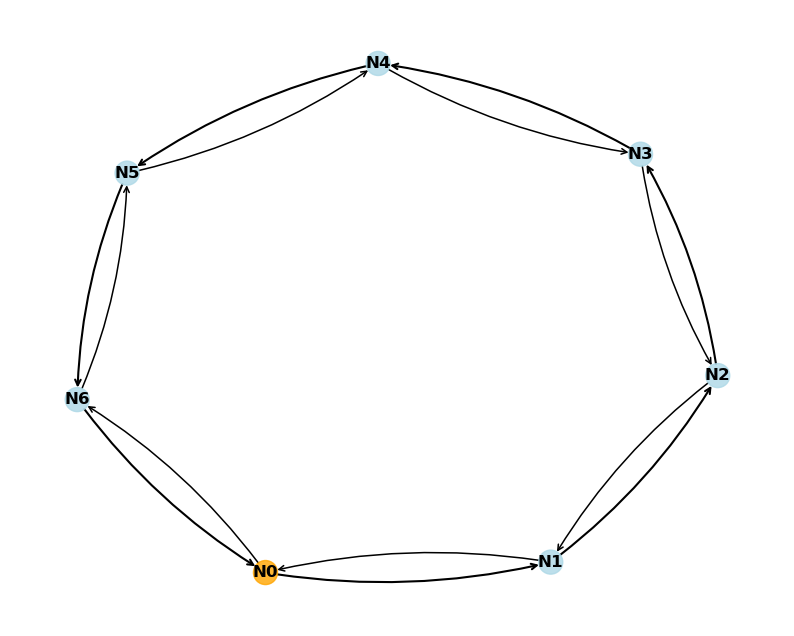

>> Code for ODE model:

global ODE_model
def ODE_model(t, z):
	# variables (node name + wt/mt)
	N0_wt, N0_mt, N1_wt, N1_mt, N2_wt, N2_mt, N3_wt, N3_mt, N4_wt, N4_mt, N5_wt, N5_mt, N6_wt, N6_mt = z
	return [
		# ΔN0_wt/Δt
		(N0_wt*((0.1 + 0.1*(250-N0_wt-(0.5*N0_mt)))-(2.0)-(2.6)))+(N1_wt*1.1)+(N6_wt*1.5),
		# ΔN0_mt/Δt
		(N0_mt*((0.1 + 0.1*(250-N0_wt-(0.5*N0_mt)))-(2.0)-(2.6)))+(N1_mt*1.1)+(N6_mt*1.5),
		# ΔN1_wt/Δt
		(N1_wt*(0-(2.0)-(2.6)))+(N0_wt*1.5)+(N2_wt*1.1),
		# ΔN1_mt/Δt
		(N1_mt*(0-(2.0)-(2.6)))+(N0_mt*1.5)+(N2_mt*1.1),
		# ΔN2_wt/Δt
		(N2_wt*(0-(2.0)-(2.6)))+(N1_wt*1.5)+(N3_wt*1.1),
		# ΔN2_mt/Δt
		(N2_mt*(0-(2.0)-(2.6)))+(N1_mt*1.5)+(N3_mt*1.1),
		# ΔN3_wt/Δt
		(N3_wt*(0-(2.0)-(2.6)))+(N2_wt*1.5)+(N4_wt*1.1),
		# ΔN3_mt/Δt
		(N3_mt*(0-(2.0)-(2.6)))+(N2_mt*1.5)+(N4_mt*1.1),
		# ΔN4_wt/Δt
		(N4_wt*(0-(2.0)-(2.6)))+(N3_wt*1.5)+(N5_wt*1.1),
		# ΔN4_mt/Δt
		(N4_mt*(0-(2.0)-(2.6)))+(N3_mt*1.5)+(N5_mt*1.1),
		# ΔN5_wt/Δt
		(N5_wt*(0-(2.0)-(2.6)))+(N4_wt*1.5)+(N6_wt*1.1),
		# ΔN5_mt

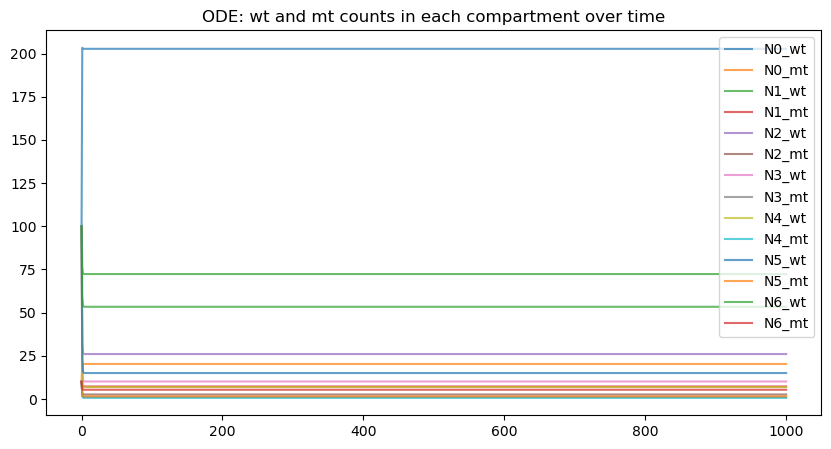

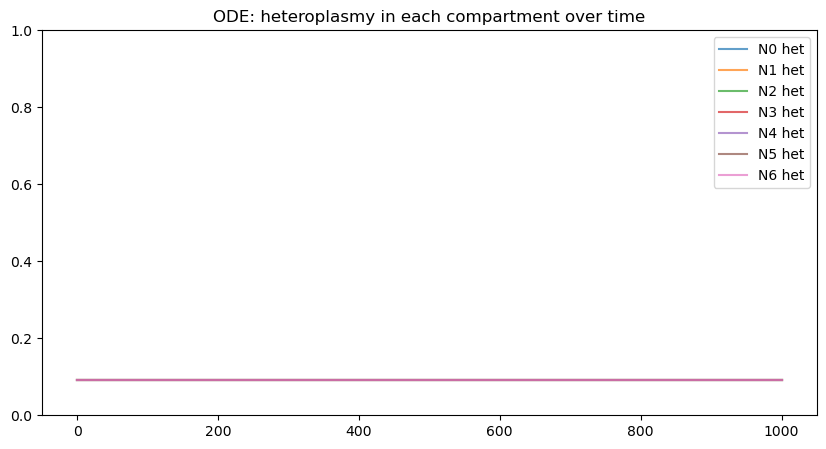

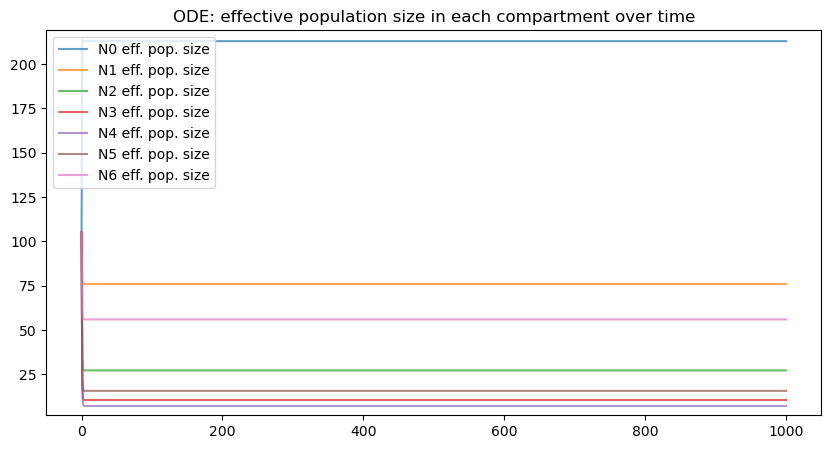

> Final counts of mt and wt in each compartment:
N0_wt	202.7367	
N0_mt	20.2737	
N1_wt	72.329	
N1_mt	7.2329	
N2_wt	26.0077	
N2_mt	2.6008	
N3_wt	10.129	
N3_mt	1.0129	
N4_wt	6.8926	
N4_mt	0.6893	
N5_wt	15.0113	
N5_mt	1.5011	
N6_wt	53.3755	
N6_mt	5.3375	

> Final effective population sizes in each compartment:
N0	212.8735	
N1	75.9455	
N2	27.3081	
N3	10.6355	
N4	7.2372	
N5	15.7619	
N6	56.0443	

>> Gillespie simulation parameters:

> Reactions:
react.#	state i	type	rate	update to system
0	0	birth	-1	[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1	1	birth	-1	[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2	0	death	2.0	[-1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
3	1	death	2.0	[0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
4	2	death	2.0	[0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
5	3	death	2.0	[0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
6	4	death	2.0	[0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
7	5	death	2.0	[0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
8	6	death	2.0	[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0,

/home/daniel/Projects/2023_Jones_Lab_mtDNA/SSD/SSD_Neuron/plot_module.py:96: RuntimeWarning: invalid value encountered in true_divide
  het = np.nanmean(mt_counts[:,i,:]/(mt_counts[:,i,:]+wt_counts[:,i,:]), axis = 0)


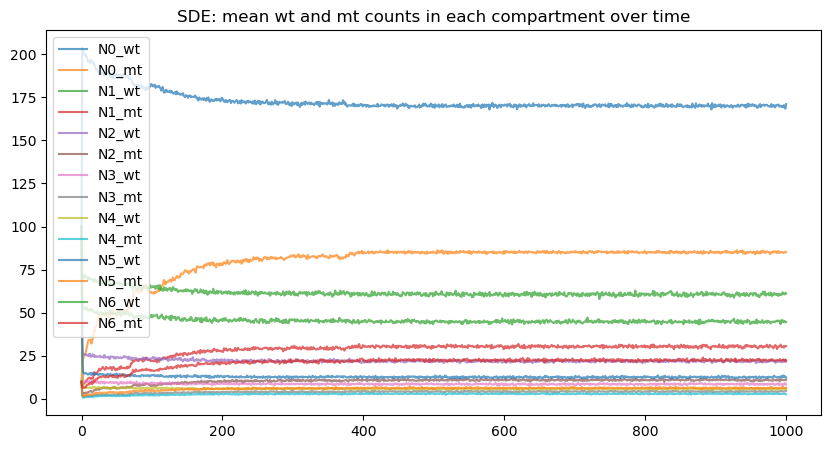

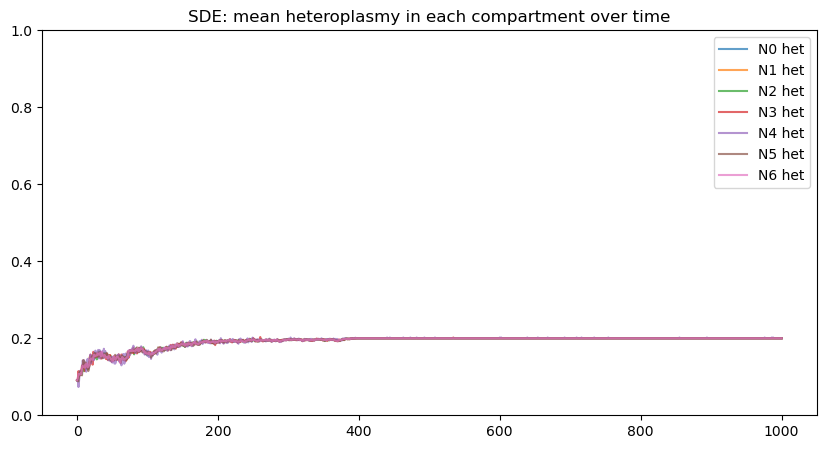

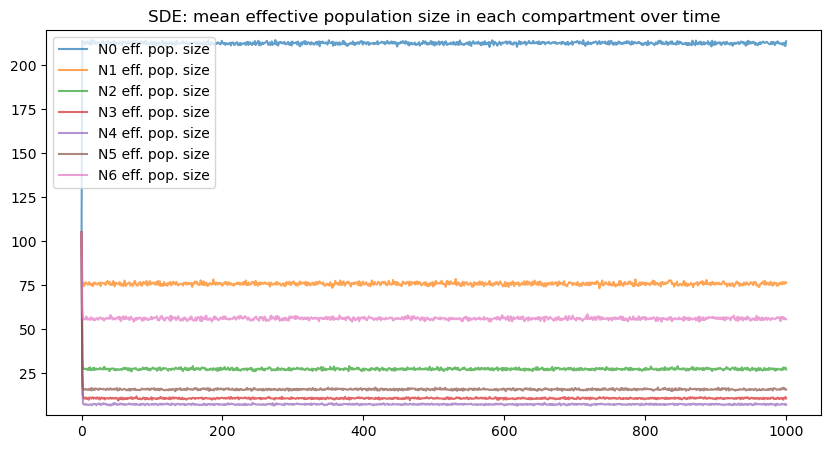

> Final mean counts of mt and wt in each compartment:
N0_wt	171.11	
N0_mt	85.21	
N1_wt	61.07	
N1_mt	30.58	
N2_wt	21.47	
N2_mt	11.08	
N3_wt	8.25	
N3_mt	4.54	
N4_wt	5.68	
N4_mt	2.62	
N5_wt	12.41	
N5_mt	6.46	
N6_wt	44.49	
N6_mt	22.26	

> Final mean heteroplasmy in each compartment:
N0	0.2	
N1	0.2	
N2	0.2	
N3	0.2	
N4	0.2	
N5	0.2	
N6	0.2	

> Final mean effective population sizes in each compartment:
N0	213.715	
N1	76.36	
N2	27.01	
N3	10.52	
N4	6.99	
N5	15.64	
N6	55.62	

> Change in mean heteroplasmy: 
start: 0.0909
final: 0.2005
delta: 0.1096


In [4]:
R_G, R_VARS, R_COMP, R_START_STATE = network_gen_ring(n_nodes, start_pop ,bio_param)
plot_network(R_G)

R_ODE_model = ODE_from_network(R_G)
plot_ODE(ODE_simulate(R_ODE_model, TIME_POINTS, R_START_STATE), TIME_POINTS, DELTA, R_VARS, R_COMP)

R_GILL_PARAM = gillespie_param_from_network(R_G)
plot_gillespie(GILL_simulate(R_GILL_PARAM, TIME_POINTS, R_START_STATE, repl), TIME_POINTS, DELTA, R_VARS, R_COMP)

## Powerlaw tree system

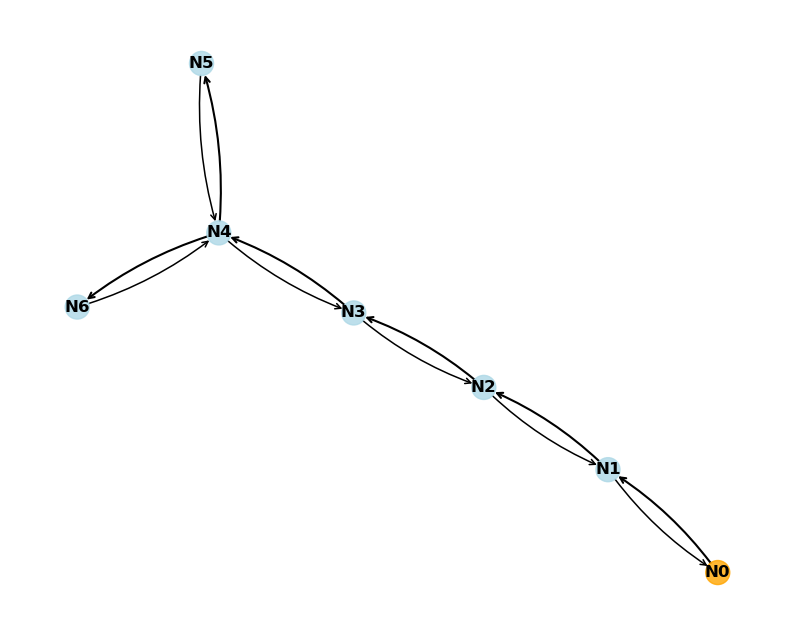

>> Code for ODE model:

global ODE_model
def ODE_model(t, z):
	# variables (node name + wt/mt)
	N0_wt, N0_mt, N1_wt, N1_mt, N2_wt, N2_mt, N3_wt, N3_mt, N4_wt, N4_mt, N5_wt, N5_mt, N6_wt, N6_mt = z
	return [
		# ΔN0_wt/Δt
		(N0_wt*((0.1 + 0.1*(250-N0_wt-(0.5*N0_mt)))-(2.0)-(1.5)))+(N1_wt*1.1),
		# ΔN0_mt/Δt
		(N0_mt*((0.1 + 0.1*(250-N0_wt-(0.5*N0_mt)))-(2.0)-(1.5)))+(N1_mt*1.1),
		# ΔN1_wt/Δt
		(N1_wt*(0-(2.0)-(2.6)))+(N0_wt*1.5)+(N2_wt*1.1),
		# ΔN1_mt/Δt
		(N1_mt*(0-(2.0)-(2.6)))+(N0_mt*1.5)+(N2_mt*1.1),
		# ΔN2_wt/Δt
		(N2_wt*(0-(2.0)-(2.6)))+(N1_wt*1.5)+(N3_wt*1.1),
		# ΔN2_mt/Δt
		(N2_mt*(0-(2.0)-(2.6)))+(N1_mt*1.5)+(N3_mt*1.1),
		# ΔN3_wt/Δt
		(N3_wt*(0-(2.0)-(2.6)))+(N2_wt*1.5)+(N4_wt*1.1),
		# ΔN3_mt/Δt
		(N3_mt*(0-(2.0)-(2.6)))+(N2_mt*1.5)+(N4_mt*1.1),
		# ΔN4_wt/Δt
		(N4_wt*(0-(2.0)-(4.1)))+(N3_wt*1.5)+(N5_wt*1.1)+(N6_wt*1.1),
		# ΔN4_mt/Δt
		(N4_mt*(0-(2.0)-(4.1)))+(N3_mt*1.5)+(N5_mt*1.1)+(N6_mt*1.1),
		# ΔN5_wt/Δt
		(N5_wt*(0-(2.0)-(1.1)))+(N4_wt*1.5),
		# ΔN5_mt/Δt
		(N5_mt

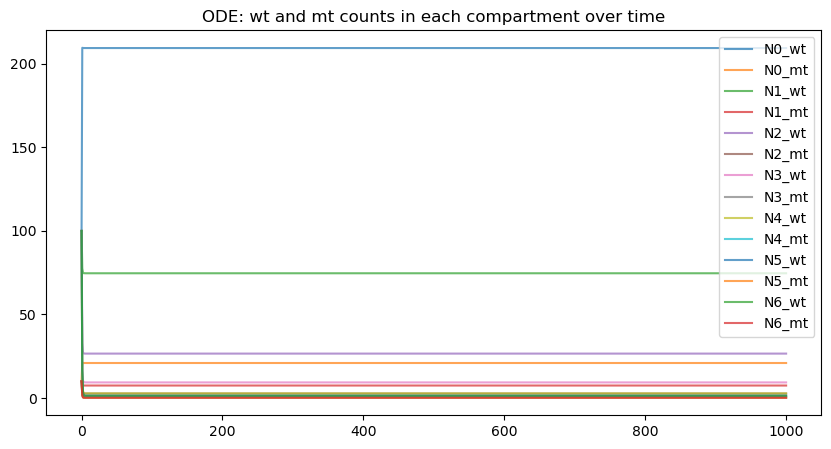

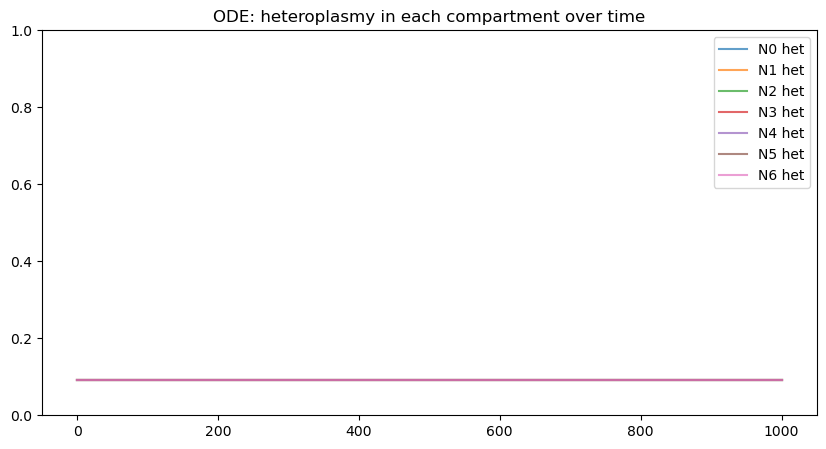

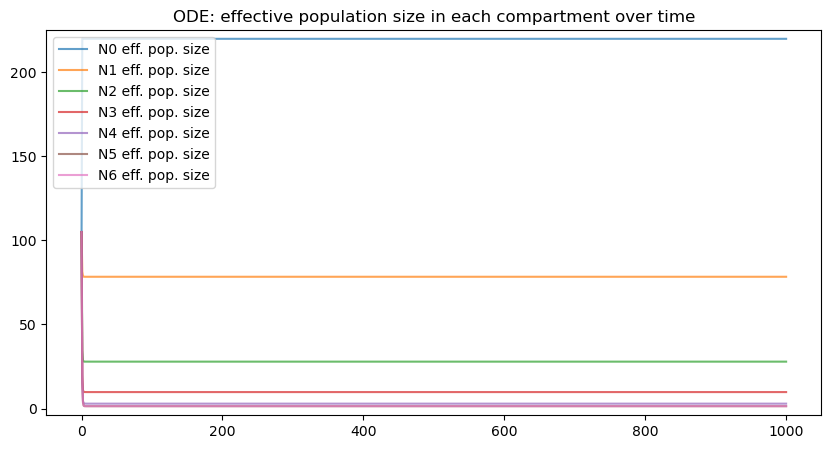

> Final counts of mt and wt in each compartment:
N0_wt	209.4483	
N0_mt	20.9448	
N1_wt	74.6531	
N1_mt	7.4653	
N2_wt	26.5746	
N2_mt	2.6575	
N3_wt	9.3302	
N3_mt	0.933	
N4_wt	2.7793	
N4_mt	0.2779	
N5_wt	1.3448	
N5_mt	0.1345	
N6_wt	1.3448	
N6_mt	0.1345	

> Final effective population sizes in each compartment:
N0	219.9207	
N1	78.3858	
N2	27.9033	
N3	9.7968	
N4	2.9183	
N5	1.4121	
N6	1.4121	

>> Gillespie simulation parameters:

> Reactions:
react.#	state i	type	rate	update to system
0	0	birth	-1	[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1	1	birth	-1	[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2	0	death	2.0	[-1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
3	1	death	2.0	[0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
4	2	death	2.0	[0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
5	3	death	2.0	[0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
6	4	death	2.0	[0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
7	5	death	2.0	[0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
8	6	death	2.0	[0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]
9

/home/daniel/Projects/2023_Jones_Lab_mtDNA/SSD/SSD_Neuron/plot_module.py:96: RuntimeWarning: invalid value encountered in true_divide
  het = np.nanmean(mt_counts[:,i,:]/(mt_counts[:,i,:]+wt_counts[:,i,:]), axis = 0)


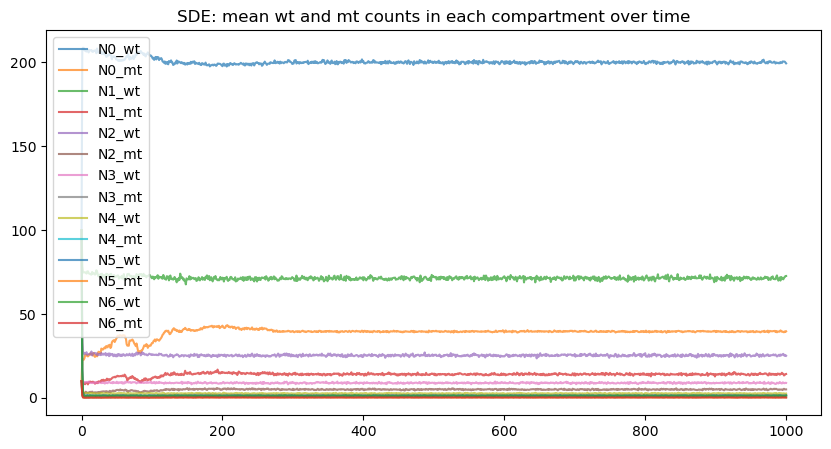

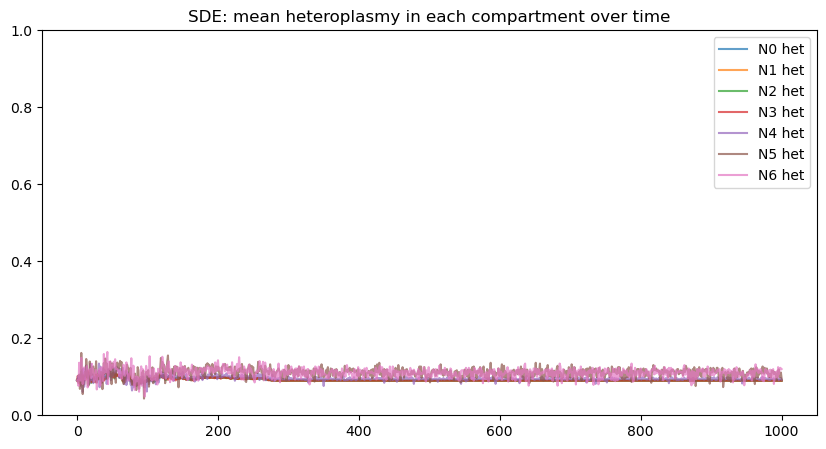

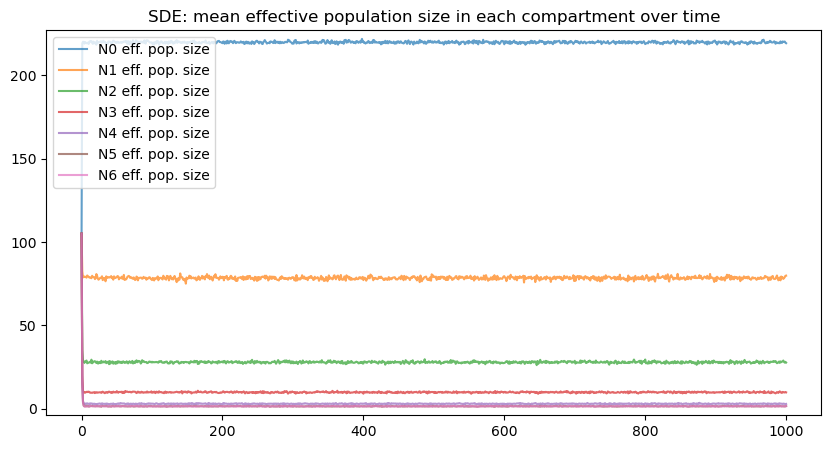

> Final mean counts of mt and wt in each compartment:
N0_wt	199.41	
N0_mt	39.67	
N1_wt	72.67	
N1_mt	14.25	
N2_wt	25.11	
N2_mt	5.06	
N3_wt	8.94	
N3_mt	1.64	
N4_wt	2.57	
N4_mt	0.47	
N5_wt	1.36	
N5_mt	0.29	
N6_wt	1.47	
N6_mt	0.21	

> Final mean heteroplasmy in each compartment:
N0	0.09	
N1	0.09	
N2	0.09	
N3	0.09	
N4	0.0928	
N5	0.0952	
N6	0.12	

> Final mean effective population sizes in each compartment:
N0	219.245	
N1	79.795	
N2	27.64	
N3	9.76	
N4	2.805	
N5	1.505	
N6	1.575	

> Change in mean heteroplasmy: 
start: 0.0909
final: 0.09
delta: -0.001


In [5]:
P_G, P_VARS, P_COMP, P_START_STATE = network_gen_powlaw_tree(n_nodes, start_pop ,bio_param)
plot_network(P_G)

P_ODE_model = ODE_from_network(P_G)
plot_ODE(ODE_simulate(P_ODE_model, TIME_POINTS, P_START_STATE), TIME_POINTS, DELTA, P_VARS, P_COMP)

P_GILL_PARAM = gillespie_param_from_network(P_G)
plot_gillespie(GILL_simulate(P_GILL_PARAM, TIME_POINTS, P_START_STATE, repl), TIME_POINTS, DELTA, P_VARS, P_COMP)